In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

FILE_PATH = r"C:\Users\onlin\Downloads\bank.csv"
df = pd.read_csv(FILE_PATH)

col_y = "deposit"

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.shape

(11162, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
df.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


In [ ]:
# Remove 'duration' column as it is not known before the call is performed
cols_drop = ["duration"] 
df = df.drop(columns=cols_drop, errors="ignore")

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes


In [ ]:
# Target variable distribution
df[col_y].value_counts()


deposit
no     5873
yes    5289
Name: count, dtype: int64

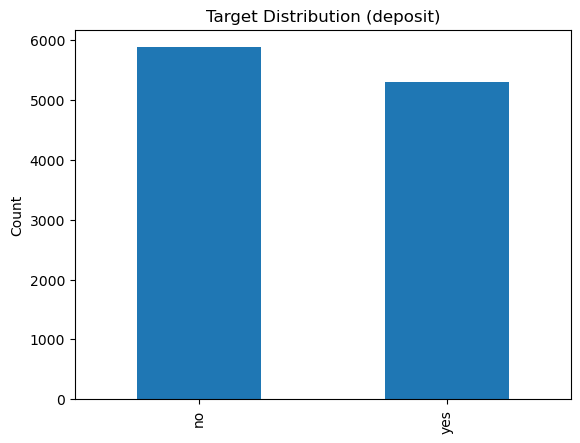

In [9]:
df[col_y].value_counts().plot(kind="bar")
plt.title("Target Distribution (deposit)")
plt.xlabel("")
plt.ylabel("Count")
plt.show()


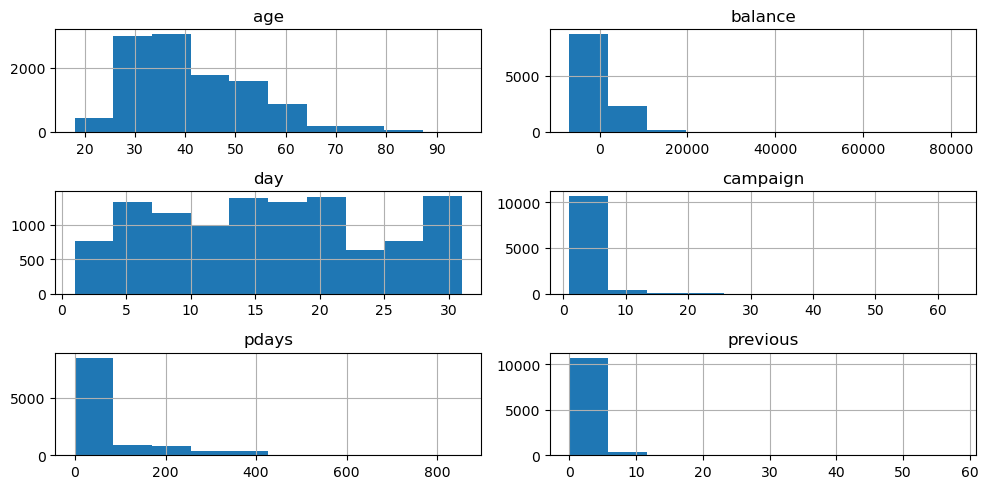

In [10]:
df.select_dtypes(include=[np.number]).hist(figsize=(10,5))
plt.tight_layout()
plt.show()


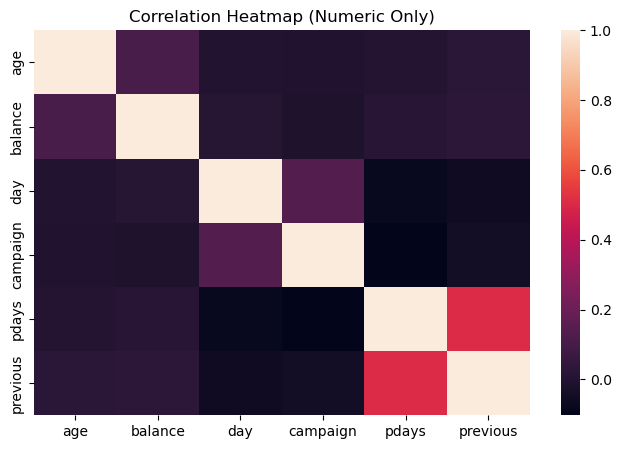

In [11]:
num_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(8,5))
sns.heatmap(df[num_cols].corr(), annot=False)
plt.title("Correlation Heatmap (Numeric Only)")
plt.show()


In [12]:
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    print(f"{col} ({df[col].nunique()}): {df[col].unique()[:10]}")


job (12): ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown']
marital (3): ['married' 'single' 'divorced']
education (4): ['secondary' 'tertiary' 'primary' 'unknown']
default (2): ['no' 'yes']
housing (2): ['yes' 'no']
loan (2): ['no' 'yes']
contact (3): ['unknown' 'cellular' 'telephone']
month (12): ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar']
poutcome (4): ['unknown' 'other' 'failure' 'success']
deposit (2): ['yes' 'no']


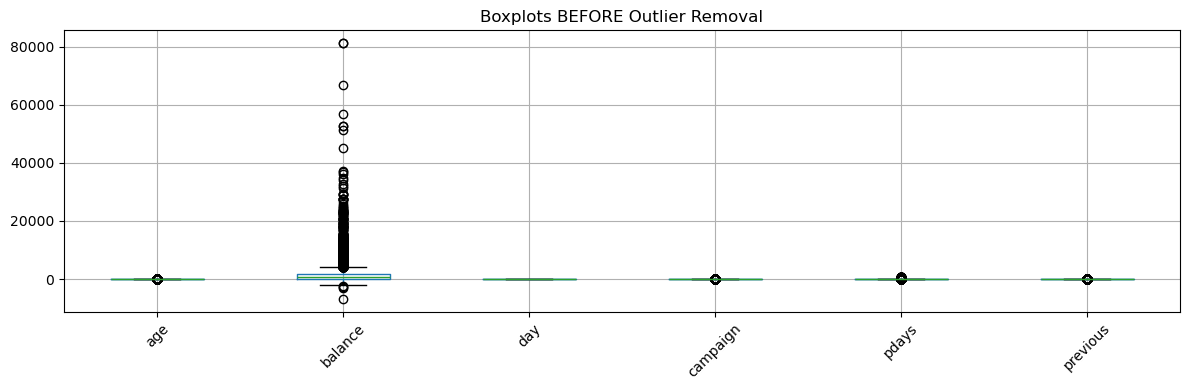

In [13]:
df[num_cols].boxplot(rot=45, figsize=(12,4))
plt.title("Boxplots BEFORE Outlier Removal")
plt.tight_layout()
plt.show()


In [14]:
df_before = df.shape[0]

outlier_cols = ["balance", "campaign", "pdays", "previous", "age"]

for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("Rows before:", df_before)
print("Rows after :", df.shape[0])
print("Rows dropped:", df_before - df.shape[0])


Rows before: 11162
Rows after : 6954
Rows dropped: 4208


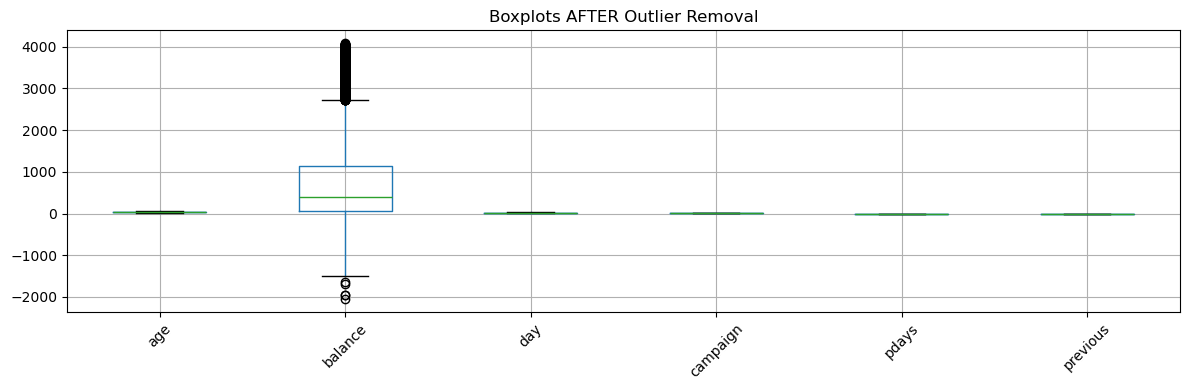

In [15]:
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].boxplot(rot=45, figsize=(12,4))
plt.title("Boxplots AFTER Outlier Removal")
plt.tight_layout()
plt.show()


In [16]:
y = df[col_y]
X = df.drop(columns=[col_y])

list(X.columns)


['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [17]:
X_ohe = pd.get_dummies(X, drop_first=True)
feature_cols = X_ohe.columns.tolist()

X_ohe.head()


,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,59,2343,5,1,-1,0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,56,45,5,1,-1,0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,41,1270,5,1,-1,0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,55,2476,5,1,-1,0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,54,184,5,2,-1,0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

test_size = 0.3
random_state = 2025

X_train, X_test, y_train, y_test = train_test_split(
    X_ohe, y, test_size=test_size, random_state=random_state, stratify=y
)

X_train.shape, X_test.shape


((4867, 38), (2087, 38))

In [ ]:
# Build and evaluate Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Random Forest (default)
rf = RandomForestClassifier(random_state=random_state)
rf.fit(X_train, y_train)

# Predict
pred_rf = rf.predict(X_test)

# Evaluate using ONLY F1 score
f1_rf = f1_score(y_test, pred_rf, pos_label="yes")
print("Random Forest F1_yes:", f1_rf)


Random Forest F1_yes: 0.5679839249832552


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer

# scorer that explicitly treats "yes" as positive class
f1_yes = make_scorer(f1_score, pos_label="yes")

rf_base = RandomForestClassifier(random_state=random_state)

param_dist = {
    "n_estimators": [300, 500, 800],          # more trees often helps
    "max_depth": [10, 20, 30],              # allow stronger trees
    "min_samples_split": [2, 5, 10],          # control overfitting
    "min_samples_leaf": [1, 2, 5],            # NEW: helps generalization
    "max_features": ["sqrt", "log2"],         # keep stable choices
    "class_weight": [None, "balanced"]        # NEW: helps minority class F1
}

rs_rf = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=20,          # search more combos (better chance)
    cv=5,
    scoring=f1_yes,     # F1 for "yes"
    n_jobs=-1,
    random_state=random_state
)

rs_rf.fit(X_train, y_train)

best_rf = rs_rf.best_estimator_
print("Best Parameters:", rs_rf.best_params_)


Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 20, 'class_weight': 'balanced'}


In [35]:
pred_best = best_rf.predict(X_test)

f1_best = f1_score(y_test, pred_best, pos_label="yes")
print("Tuned Random Forest F1_yes:", f1_best)


Tuned Random Forest F1_yes: 0.6267772511848341
